In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import random

In [111]:
def plot_scatter(data_A, data_B, x_axis, label_A, label_B, label_x, label_y, title):

    x = x_axis
    a = data_A
    b = data_B

    fig, ax = plt.subplots()
    ax.scatter(x, a, color = "r", label = label_A)
    ax.scatter(x, b, color = "b", label = label_B)
    
    red_patch = mpatches.Patch(color = 'r', label = label_A)
    blue_patch = mpatches.Patch(color = 'b', label = label_B)
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    
    plt.show()

Exercise 1

In [112]:
def points_distribution(points_n, dimensions_n, radius):
    
    points = [[np.random.uniform(-1, 1) for i in range(dimensions_n)] for j in range(points_n)]
    center_point = np.zeros(dimensions_n)
    
    in_ball = [points[i] for i in range(points_n) if (np.linalg.norm(points[i] - center_point) <= radius)]
    
    not_in_ball = [points[i] for i in range(points_n) if (np.linalg.norm(points[i] - center_point) > radius)]
    
    in_ball_percent = 100 * len(list(in_ball)) / points_n
    not_in_ball_percent = 100 * len(list(not_in_ball)) / points_n
    return in_ball_percent, not_in_ball_percent

In [113]:
points_distribution(100, 4, 1)

in_b, not_in_b = points_distribution(100, 4, 1)
print("Points in ball: " + str(in_b) + " %, Points not in ball: " + str(not_in_b) + " %")

Points in ball: 34.0 %, Points not in ball: 66.0 %


Create a plot

In [114]:
def points_distribution_plot(samples_n):
    in_ball = []
    out_ball = []
    dimension = []
    d = 2
    for i in range(samples_n):
        p = 1000
        d += 1
        d_actual = (d % 10) + 1
        in_b, out_b = points_distribution(p, d_actual, 1)
        in_ball.append(in_b)
        out_ball.append(out_b)
        dimension.append(d_actual)
    return in_ball, out_ball, dimension

In [115]:
in_ball, out_ball, dim = points_distribution_plot(500)

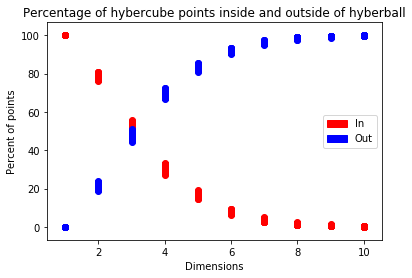

In [116]:
plot_scatter(in_ball, out_ball, dim, "In", "Out", "Dimensions", "Percent of points", "Percentage of hybercube points inside and outside of hyberball")

Exercise 2

In [117]:
def create_hypercube(points_n, dimensions_n):
    points = [[np.random.uniform(-1, 1) for i in range(dimensions_n)] for j in range(points_n)]
    return points

In [118]:
def mean_and_std_distance_hypercube(points_n, dimensions_n, samples_n):
    points = create_hypercube(points_n, dimensions_n)
    sampled_points = np.array(random.sample(points, samples_n))
    distances = []
    
    for i in range(samples_n):
        for j in range(i + 1, samples_n):
            distance = np.linalg.norm(sampled_points[i] - sampled_points[j])
            distances.append(distance)
    
    return np.mean(distances), np.std(distances)

In [119]:
print(mean_and_std_distance_hypercube(1000, 5, 250))

(1.7432727072033727, 0.4924317171414998)


In [120]:
def mean_and_std_plot(samples_n):
    mean = []
    std = []
    dimension = []
    d = 2
    
    for d in range(2, 11):
        for i in range(samples_n):
            p = 1000
            m, s = mean_and_std_distance_hypercube(1000, d, 400)
            mean.append(m)
            std.append(s)
            dimension.append(d) 
        
    return mean, std, dimension

In [142]:
mean, std, dim = mean_and_std_plot(20)

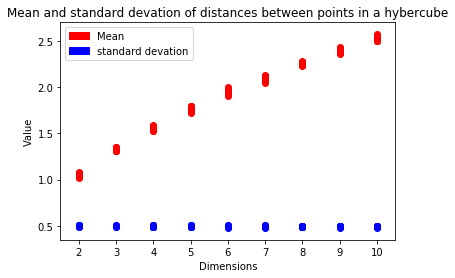

In [143]:
plot_scatter(mean, std, dim, "Mean", "standard devation", "Dimensions", "Value", "Mean and standard devation of distances between points in a hybercube")

Exercise 3

In [123]:
# https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python
def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def calculate_angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))

In [124]:
def create_vector(starting_point, ending_point):
    return [e - s for s, e in zip(starting_point, ending_point)]

In [125]:
create_vector([1, 2], [3, 4])

[2, 2]

In [126]:
def angle_between_two_vectors(points, samples_n):
    angles = []
    for i in range(samples_n):
        sampled_points = np.array(random.sample(points, 4))
        vector_1 = create_vector(sampled_points[0], sampled_points[1])
        vector_2 = create_vector(sampled_points[2], sampled_points[3])
        angle_radian = calculate_angle(vector_1, vector_2)
        angle_degree = angle_radian * 180 / math.pi
        angles.append(angle_degree)
    return angles
        

In [127]:
points = create_hypercube(1000, 6)

In [128]:
print(angle_between_two_vectors(points, 10))

[108.63445881362514, 66.20634668797774, 71.9435706839077, 105.17751377919232, 126.5846720742989, 56.04893100924333, 59.78424056954921, 102.21342654297085, 83.52427836764507, 103.6478604307158]


In [129]:
def plot_angle_distribution_in_dimension(dimensions_n, samples_n):
    points = create_hypercube(1000, dimensions_n)
    angles = angle_between_two_vectors(points, samples_n)
    return angles 

In [130]:
def plot_histogram(data, bins, label_x, label_y, title):
    plt.hist(data, bins)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)

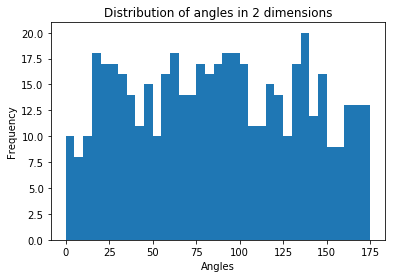

In [131]:
plot_histogram(plot_angle_distribution_in_dimension(2, 500), np.arange(start = 0, stop = 180, step = 5), "Angles", "Frequency", "Distribution of angles in 2 dimensions")

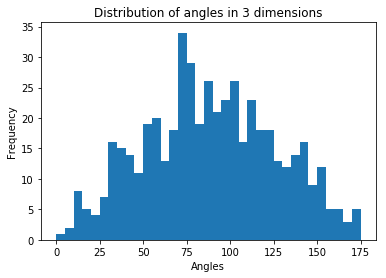

In [132]:
plot_histogram(plot_angle_distribution_in_dimension(3, 500), np.arange(start = 0, stop = 180, step = 5), "Angles", "Frequency", "Distribution of angles in 3 dimensions")

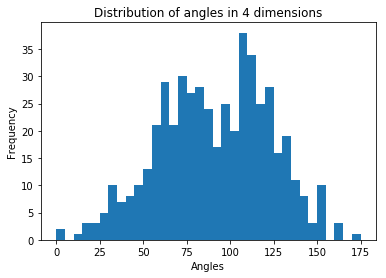

In [133]:
plot_histogram(plot_angle_distribution_in_dimension(4, 500), np.arange(start = 0, stop = 180, step = 5), "Angles", "Frequency", "Distribution of angles in 4 dimensions")

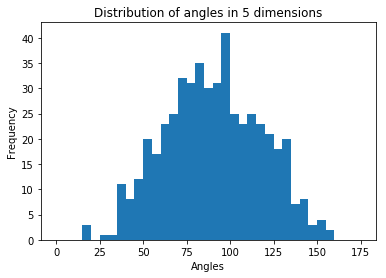

In [134]:
plot_histogram(plot_angle_distribution_in_dimension(5, 500), np.arange(start = 0, stop = 180, step = 5), "Angles", "Frequency", "Distribution of angles in 5 dimensions")

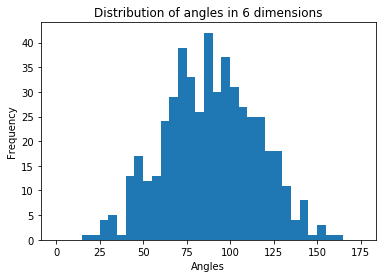

In [135]:
plot_histogram(plot_angle_distribution_in_dimension(6, 500), np.arange(start = 0, stop = 180, step = 5), "Angles", "Frequency", "Distribution of angles in 6 dimensions")

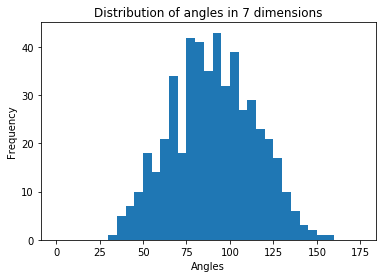

In [136]:
plot_histogram(plot_angle_distribution_in_dimension(7, 500), np.arange(start = 0, stop = 180, step = 5), "Angles", "Frequency", "Distribution of angles in 7 dimensions")

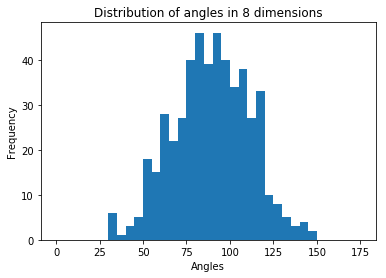

In [137]:
plot_histogram(plot_angle_distribution_in_dimension(8, 500), np.arange(start = 0, stop = 180, step = 5), "Angles", "Frequency", "Distribution of angles in 8 dimensions")

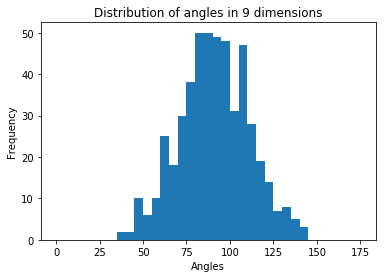

In [138]:
plot_histogram(plot_angle_distribution_in_dimension(9, 500), np.arange(start = 0, stop = 180, step = 5), "Angles", "Frequency", "Distribution of angles in 9 dimensions")

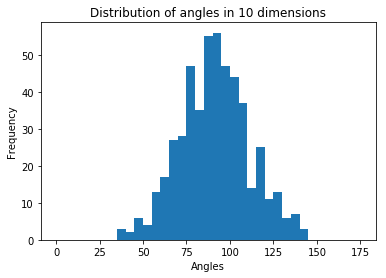

In [139]:
plot_histogram(plot_angle_distribution_in_dimension(10, 500), np.arange(start = 0, stop = 180, step = 5), "Angles", "Frequency", "Distribution of angles in 10 dimensions")